In [1]:
# imports for matplot/pandas/seaborn
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv("../Input/SiouxFalls_network.csv",  
                  names=["Edge", "Origin", "Destination", "FFT","Capacity", "alpha", "beta"])
data

,Edge,Origin,Destination,FFT,Capacity,alpha,beta
0,E001,N001,N002,6,25900.200640,0.15,4
1,E002,N001,N003,4,23403.473190,0.15,4
2,E003,N002,N001,6,25900.200640,0.15,4
3,E004,N002,N006,5,4958.180928,0.15,4
4,E005,N003,N001,4,23403.473190,0.15,4
...,...,...,...,...,...,...,...
71,E072,N023,N022,4,5000.000000,0.15,4
72,E073,N023,N024,2,5078.508436,0.15,4
73,E074,N024,N013,4,5091.256152,0.15,4
74,E075,N024,N021,3,4885.357564,0.15,4


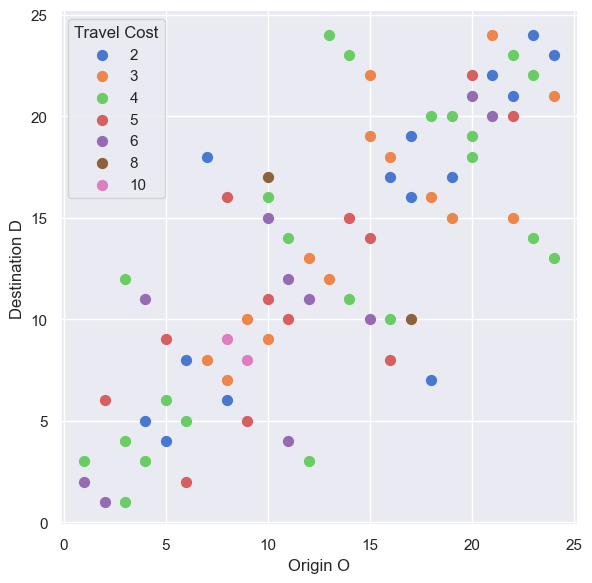

In [5]:
# Free Flow Travel Times // STILL MISSING / CANT USE FORMATTER
# Fix N005 -> 005 or choose svg from Repository 
# MAYBE ADJUST (heatmap?) OR DELETE, NOT EASY TO READ / If deleted include corresponding csv
sns.set_theme(style="darkgrid")
net = pd.read_csv("SiouxFalls_from_[58].csv")
ax = sns.lmplot(
    data=net, x="A", y="B", hue="a0",
     palette= "muted", ci= None,height=6, aspect=1/1,
     scatter_kws={"s": 50, "alpha": 1}, fit_reg=False,
)
ax.set(xlabel='Origin O', ylabel ='Destination D')
plt.legend(title='Travel Cost')
ax.legend.remove()
#save
plt.savefig("../PythonNotebook- AdditionalResults/VectorGraphics/freeflow.svg")

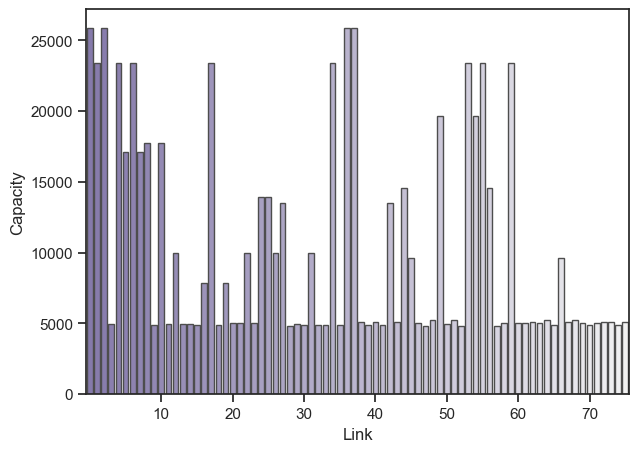

In [5]:
# Sioux Falls Link Capacities
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))

sns.barplot(
    data=data,
    x="Edge", y = "Capacity",
    
    palette="light:m_r",
    edgecolor=".3",

)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([10, 20, 30, 40, 50, 60 ,70])
ax.set(xlabel='Link', ylabel ='Capacity')

plt.savefig("../PythonNotebook- AdditionalResults/VectorGraphics/Capacity.svg")

[Text(0.5, 0, 'Number of Edge'), Text(0, 0.5, '')]

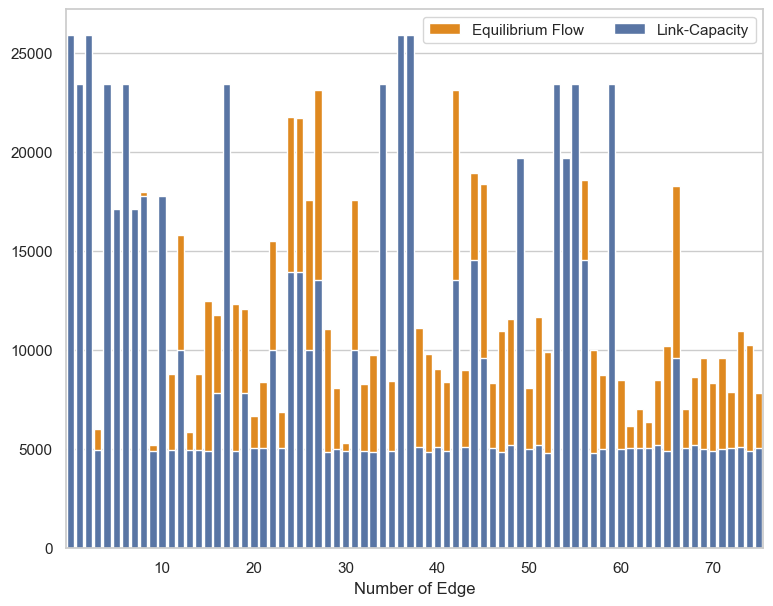

In [6]:
results = pd.read_csv("../Output- EquilibriumResults/EquilibriumFlows_Costs.csv")

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(9, 7))


sns.barplot(
    data=results,
    x="EdgeNumber", y = "Flow",
    label ="Equilibrium Flow",
    #palette="pastel",
    #edgecolor=".3",
    color="darkorange"

)

sns.barplot(x="Edge", 
            y ="Capacity", 
            data = data,
            color="b",
            label ="Link-Capacity",
            #edgecolor=".3",
            
            )

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([10, 20, 30, 40, 50, 60 ,70])
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel='Number of Edge', ylabel ='')

plt.savefig("../PythonNotebook- AdditionalResults/VectorGraphics/FlowVsCapacity.svg")

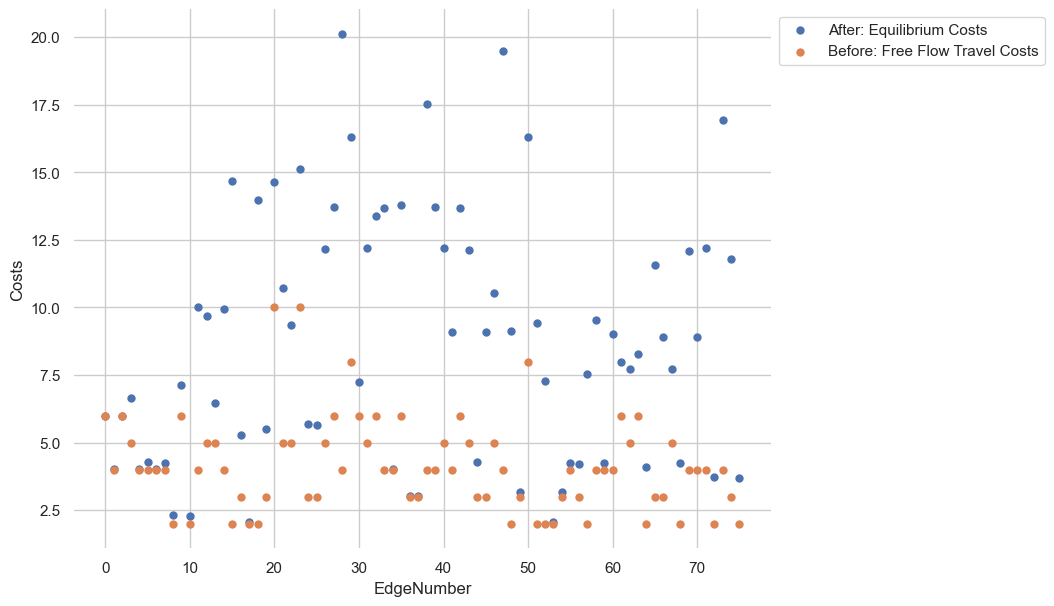

In [61]:
# again E005 -> 005 from int to string (Now starts at 0 instead of 1 because of Formatter (Link 0-75) // paper still 1-76)
sns.set_theme(style="whitegrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(9, 7))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="EdgeNumber", y="Costs",
                 
                
                sizes=(30, 30), linewidth=0,
                label ="After: Equilibrium Costs",
                data=results,
               
                ax=ax)

sns.scatterplot(x="Edge", y="FFT",
                
                
                sizes=(30, 30), linewidth=0,
                label ="Before: Free Flow Travel Costs",
                data=data, ax=ax)

ax.legend(ncol=2, loc="best", frameon=True)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([0,10, 20, 30, 40, 50, 60 ,70])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig("../PythonNotebook- AdditionalResults/VectorGraphics/CostsBeforeAfter.svg")

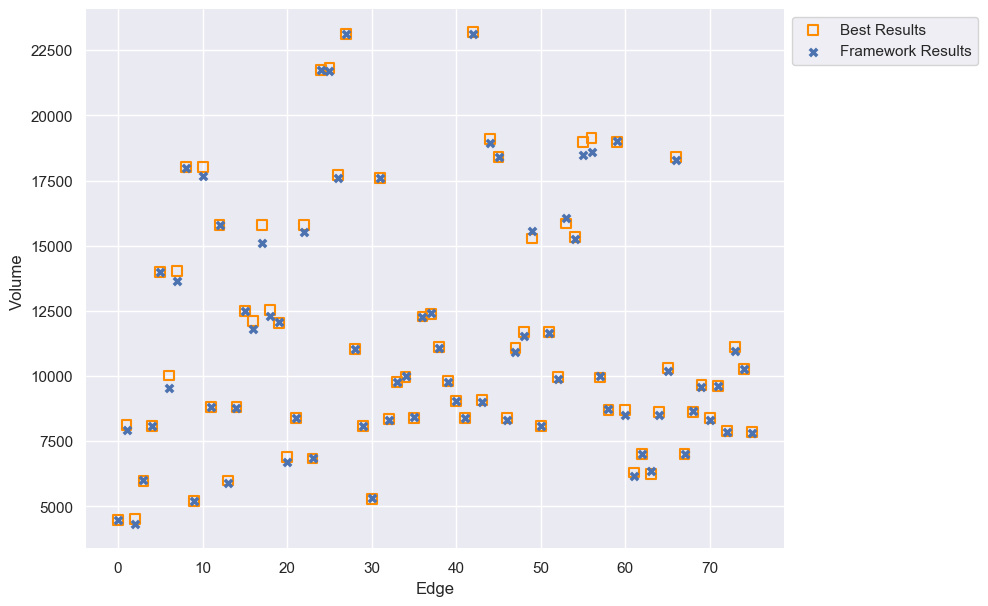

In [104]:
#(Now starts at 0 instead of 1 because of Formatter (Link 0-75) // paper still 1-76)
# decide what format to take because of slight offset with empty circle
#Again convert Edges to int (starts at 0 now, so 0-75 / 1-76 )
myResults = pd.read_csv("../Output- EquilibriumResults/EquilibriumFlows_Costs.csv")
bestResults = pd.read_csv("bestFlows.csv")

sns.set_theme(style="darkgrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(9, 7))
sns.despine(f, left=True, bottom=True)


sns.scatterplot(x="Edge", y="Volume ",
                
                
                sizes=(30, 30), linewidth=1.5,
                label ="Best Results",
                data=bestResults, 
                marker="s", ec='darkorange', s=50, fc = 'None', 
                ax=ax
                )

sns.scatterplot(x="EdgeNumber", y="Flow",
                 
                
                sizes=(30, 30), linewidth=0,
                label ="Framework Results",
                data=myResults, 
                marker='X', ec="face", s=50, fc = "b",
               
                ax=ax)

ax.legend(ncol=2, loc="best", frameon=True)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([0 ,10, 20, 30, 40, 50, 60 ,70])

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig("../PythonNotebook- AdditionalResults/VectorGraphics/flowsOverlap.svg")

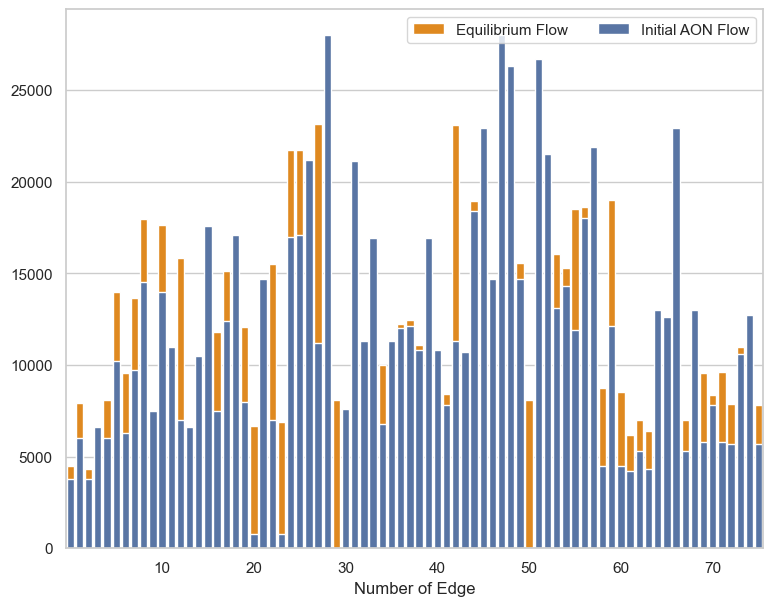

In [62]:
# Initial plausible Flow-Pattern vs Final Equilibrium Flows 
sns.set_theme(style="whitegrid")
#sns.set_style("ticks")
AONflows = pd.read_csv("CostsAON.csv")

f, ax = plt.subplots(figsize=(9, 7))

sns.barplot(
    data=results,
    x="EdgeNumber", y = "Flow",
    label ="Equilibrium Flow",
    #palette="pastel",
    #edgecolor=".3",
    color="darkorange"

)

#sns.set_color_codes("pastel")
sns.barplot(x="EdgeNumber", 
            y ="AONFlow", 
            data = AONflows,
            #palette="PuBuGn_d", 
            color="b",
            label ="Initial AON Flow",
            #edgecolor=".3",
            
            )



ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([10, 20, 30, 40, 50, 60 ,70])
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel='Number of Edge', ylabel ='')

plt.savefig("../PythonNotebook- AdditionalResults/VectorGraphics/AONflows.svg")

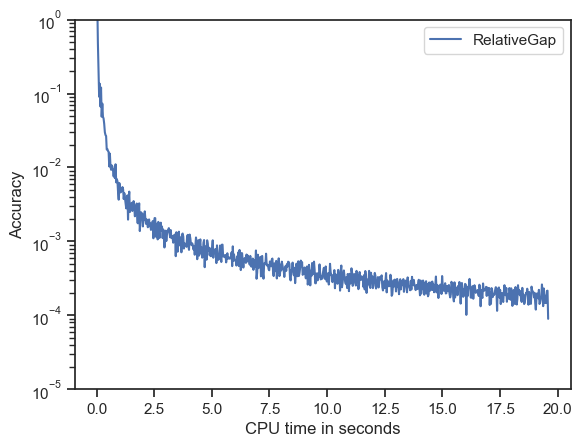

In [67]:
# Accuracy related to CPU time

sns.set_style("ticks")

gf = pd.read_csv("../Output- EquilibriumResults/Accuracy_Time_Iteration.csv")
ax  =gf.plot(x="CPU_time", y="RelativeGap")
ax.set(ylim=(0.00001,1))
ax.set(xlabel='CPU time in seconds', ylabel ='Accuracy')
plt.yscale('log')

plt.savefig("../PythonNotebook- AdditionalResults/VectorGraphics/SiouxAccuracyCPUtime.svg")

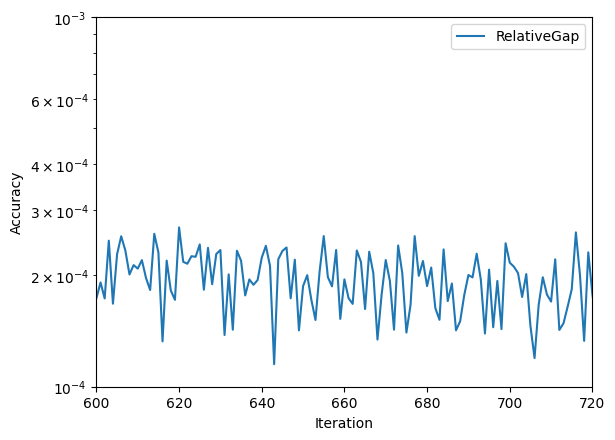

In [24]:
# ZickZack Behaviour near solution 
cf = pd.read_csv("../Output- EquilibriumResults/Accuracy_Time_Iteration.csv")
ax =cf.plot(x="Iteration", y="RelativeGap")
ax.set(xlim=(600,720))
ax.set(ylim=(10 ** -4, 10 ** -3))
ax.set(xlabel='Iteration', ylabel ='Accuracy')
plt.yscale('log')

plt.savefig("../PythonNotebook- AdditionalResults/VectorGraphics/SiouxFWZickZack.svg")

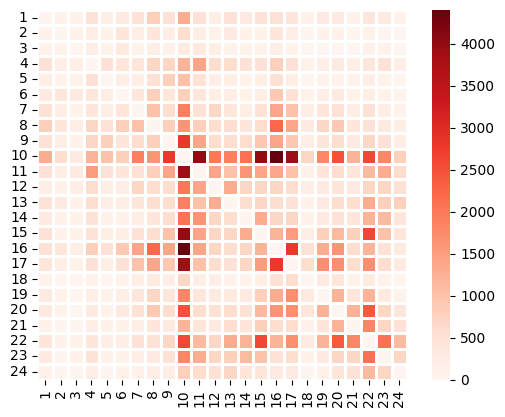

In [8]:
tips = pd.read_csv('od_demand_[60].csv')
df = pd.DataFrame(data = tips, columns=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24"])
y_axis_labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
ax = sns.heatmap(df, cmap = "Reds", yticklabels=y_axis_labels, linewidth = 1, linecolor="white", square = True)

plt.savefig("../PythonNotebook- AdditionalResults/VectorGraphics/OD_matrix.svg")

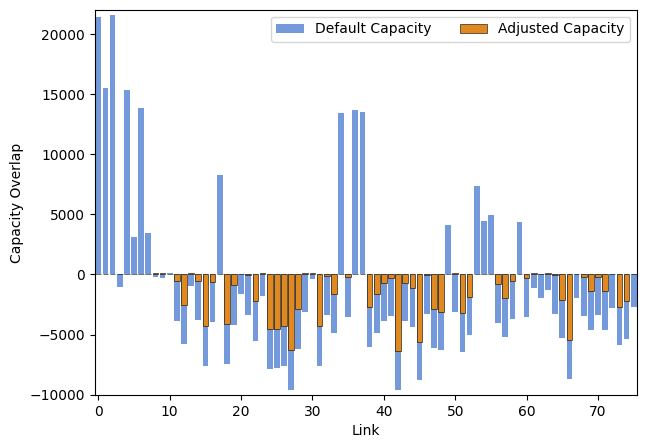

In [36]:
ff = pd.read_csv("Capacity_test.csv")

f, ax = plt.subplots(figsize=(7, 5))


sns.barplot(
    data=ff,
    x="edge", y = "old_difference",
    label = "Default Capacity",
    #palette="light:m_r",
    color="cornflowerblue",
    #edgecolor=".3",

)

sns.barplot(
    data=ff,
    x="edge", y = "difference_current",
    label = "Adjusted Capacity",
    #palette="light:m_r",
    edgecolor="0", linewidth =0.4,
    color="darkorange",

)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([0,10, 20, 30, 40, 50, 60 ,70])
ax.set(xlabel='Link', ylabel ='Capacity Overlap')
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylim=(-10000,22000))
plt.savefig("../PythonNotebook- AdditionalResults/VectorGraphics/CapacityOverlap.svg")

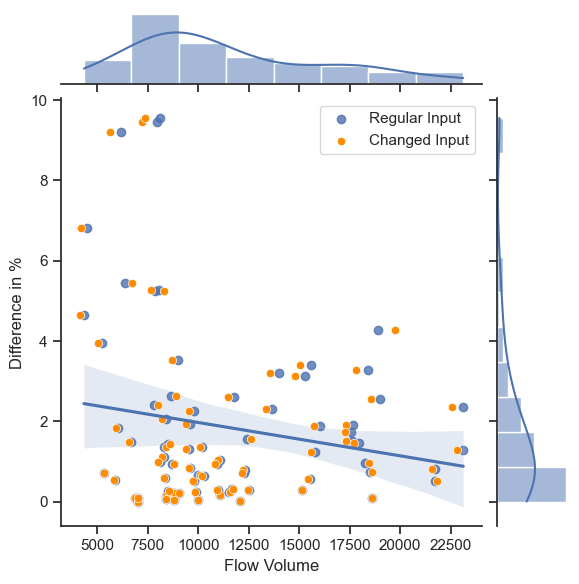

In [3]:
sns.set_theme(style="ticks")


cf = pd.read_csv("Sensitivity_Diff.csv")
#f, ax = plt.subplots(figsize=(7, 5))

ax = sns.jointplot(
    data=cf,
    y="Difference", x = "ActualFlow",
    label = "Regular Input",
    #palette="light:m_r",
    color="b",kind ="reg"
    #edgecolor=".3",

)

sns.scatterplot(
    data=cf,
    y="Difference", x = "ChangedDemand",
    
    color="darkorange",  #kind ="reg"
    label = "Changed Input"
    #edgecolor=".3",
    #linewidth = 1

)

ax.ax_joint.set_xlabel('Flow Volume')
ax.ax_joint.set_ylabel('Difference in %')
plt.savefig("../PythonNotebook- AdditionalResults/VectorGraphics/Sensitivity.svg")